## My algorithm

1. make the smallest valid polygon (a triangle)
2. randomly draw a valid point (x,y) position from combination of possible x, y lists
3. if the random vertex is not intersecting with the original polygon:
    * iterate over the list of vertexe's in the original polygon, and see if there is a location it can be placed in the order, which will create a simple polygon (with more sides). If so, place it.
4. repeat step 3 until you have reached a desired number of vertex's in the polygon (or until a try limit is reached).

5. Step 3 will have to be extended with logic to test the linear slopes between vertex's also, to ensure no repeated slope is added...

Note, valid simple polygons could be made from points which intersect. This is probably key to making the smallest possible polygons actually... 

In [1]:
import copy
import numpy as np
from random import choice
import shapely.geometry as geometry
#import geopandas as gpd
#import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def random_vertex(rows, columns):
    """Return a random vertex from an avaiable list of choices,
    and, after selecting one, remove it from future selection."""
    random_row = choice(rows)
    random_column = choice(columns)
    rows.remove(random_row)
    columns.remove(random_column)
    return (random_row, random_column), rows, columns

def random_triangle(rows, columns):
    """Obtain coordinates for a starting shape from a grid of n x n,
    for the simplest valid ploygon: a triangle"""
    area = 0.0
    i = 0
    while area <= 0.0:
        i += 1
        if i > 10:
            raise AssertionError("Halted as I couldn't find valid triangle in 10 attempts.")
        coordinates = []
        while len(coordinates) < 3:
            vertex, rows, columns = random_vertex(rows, columns)
            coordinates.append(vertex)
            coordinates = list(set(coordinates)) # Ensure unique points only
        tmp_poly = geometry.Polygon(coordinates)
        area = tmp_poly.area
    return coordinates, rows, columns

In [3]:
def slope_of_vertexes(vertex1, vertex2):
    """Slope between two xy pairs, calculated as y2-y1/x2-x1"""
    slope = (vertex2[1] - vertex1[1])/(vertex2[0] - vertex1[0])
    #print("Slope between {0} and {1} is {2}".format(vertex1, vertex2, slope))
    return slope

def check_slopes(coordinates):
    """Return True if the slopes calculated from a given list of ordered coordinates
    contain no repeats, otherwise return false."""
    slope_list = []
    for i, vertex in enumerate(coordinates):
        vertex1 = starting_triangle[i-1]
        slope_list.append(slope_of_vertexes(coordinates[i-1] ,vertex))
    assert len(coordinates) == len(slope_list), "slopes were not equal to coordinates"
    if len(set(slope_list)) < len(slope_list):
        #print("Repeated angle present in polygon")
        return False
    else:
        #print("Valid: No repeated angles in polygon")
        return True

5.5


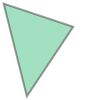

In [4]:
n = 5
rows = list(range(n))
columns = list(range(n))

cs, rows, columns = random_triangle(rows, columns)
p = geometry.Polygon(cs)
print(p.area)
p

In [135]:
# No repeating points in columns, rows, or angles 

n = 5
rows = list(range(n))
columns = list(range(n))

#1. Create coordinates for a starting polygon (a triangle)
cs, rows, columns = random_triangle(rows, columns)

# 2. Check slopes between given coordinates do not repeat
check_slopes(cs)

# choose random vertex in n x n and see if it can be added between any coordinates to make a simple polygon

# ensure no duplicate slopes: if so, throw away last change, and try a new random vertex.

# stop when you have reached vertex number = n

# find area of final shape

True

In [111]:
starting_triangle

[(0, 1), (4, 1), (1, 4)]

In [202]:
def grow_a_polygon(n):
    rows = list(range(n))
    columns = list(range(n))
    print('row, col check:', len(rows), len(columns))
    coordinates, rows, columns = random_triangle(rows, columns)
    print('row, col check:', len(rows), len(columns))
    while len(coordinates) < n:
        print('poly size:',len(coordinates))
        tmp_vert, tmp_rows, tmp_columns = random_vertex(rows, columns)
        print('   trying,', tmp_vert, len(tmp_rows), len(tmp_columns))
        valid_shape = False
        no_slope_repeats = False
        shape_found = False
        i = 0
        while i < len(cs) or not shape_found:
            tmp_cs = copy.deepcopy(cs)
            tmp_cs.insert(i, v)
            tmp_p = geometry.Polygon(tmp_cs)
            valid_shape = tmp_p.is_valid
            no_slope_repeats = check_slopes(tmp_cs)
            i += 1
            if valid_shape and no_slope_repeats:
                rows = tmp_rows
                columns = tmp_columns
                coordinates = tmp_cs
                shape_found = True
    return coordinates

cs = []
itry = 0
while len(cs) < 5 or itry < 20:
    try:
        cs = grow_a_polygon(5)
    except:
        print("Didnt work...")

row, col check: 5 5
row, col check: 2 2
poly size: 3
   trying, (1, 0) 1 1
poly size: 4
   trying, (3, 2) 0 0
poly size: 4


IndexError: Cannot choose from an empty sequence

In [168]:
# create c diffrent orders, inserting the random vertex at i-th position
# in each one, and test if the new shape is valid:
for i, c in enumerate(cs):
    tmp_cs = copy.deepcopy(cs)
    tmp_cs.insert(i, v)
    print(tmp_cs)

[(1, 0), (0, 3), (2, 1)]
[(4, 2), (1, 0), (0, 3), (2, 1)]
[(1, 0), (0, 3), (2, 1)]
[(1, 0), (4, 2), (0, 3), (2, 1)]
[(1, 0), (0, 3), (2, 1)]
[(1, 0), (0, 3), (4, 2), (2, 1)]


In [169]:
tmp_p = geometry.Polygon(tmp_cs)

In [174]:
tmp_p.is_valid and check_slopes(tmp_cs)

True

In [8]:
cond1 = True
itry = 0
while itry < 10:
    try:
        print(itry)
        itry += 1
    except:
        "didnt get there"

SyntaxError: unexpected EOF while parsing (<ipython-input-8-8b9dc8a38e38>, line 4)

In [3]:

    
def good_point(polygon, vertex):
    """If a given vertex does not intersect a given polygon
    return True"""
    if polygon.intersects(vertex):
        return False
    else:
        return True


    
def try_to_build_polygon(n):
    """Grow a simple polygon of n vertexes incrementally from a
    triangle by adding individual non-intersecting vertexes. The
    vertexes are of random, valid integer coordinate pairs, given 
    in the rows and columns lists. This may fail, and return a
    None instead of a polygon."""
    rows = list(range(n))
    columns = list(range(n))
    poly, coordinates = starting_triangle(rows, columns)
    try_count = 0
    while len(coordinates) < n:
        try_count += 1
        #print("Attempting to add vertex. Try {}...".format(try_count), end='\r')
        try:
            rows, random_row = choose(rows)
            columns, random_column = choose(columns)
        except:
            return None
        vertex = geometry.point.Point(random_row, random_column)
        if good_point(poly, vertex):
            coordinates.append(vertex)
            point_collection = geometry.MultiPoint(coordinates)
            poly = point_collection.convex_hull
            #print("Added a vertex. (total = {0})".format(len(coordinates)))
        if try_count > 100 or len(rows) == 0 and len(coordinates) < n:
            #print('Unable to finish. Tried to find vertex {0} times.'.format(try_count))
            return None
        if len(coordinates) == n:
            print("Successfully calculated polygon!")
            #for x in coordinates:
            #    print(x)
            return coordinates #poly

def random_polygon(n, limit=100):
    """Try (a limited number of times, set by limit) to
    find a simple polygon with a specific number of vertecies"""
    attempt = 0
    poly = None
    while not poly:
        poly = try_to_build_polygon(n)
        attempt += 1
        if attempt > limit:
            print("Reached try limit. No polygon found.")
            break
    return poly

def point_to_tuple(point):
    """Convert shapley point to x,y tuple"""
    x, y = point.xy
    return (x[0], y[0])

In [ ]:
poly = random_polygon(n=15, limit = 220)
#if poly:
#    print("Number of vertices = {0}".format(len(poly.boundary.coords.xy[0]) -1 ))
#    print('Area = {0} units'.format(poly.area))
#    print('x-coordinates',poly.boundary.coords.xy[0])
#    print('y-coordinates',poly.boundary.coords.xy[0])
poly